In [1]:
import matplotlib.pyplot as plt
import numpy as np

import imp
import os
path="/content/drive/MyDrive/MADE/3-dl-rl/hw1"
os.chdir(path)
os.listdir(path)

['__pycache__',
 'MADE -- RL and Advanced DL -- Домашнее задание 1.gdoc',
 '.ipynb_checkpoints',
 'blackjack.py',
 'ML-RL HW1 Salikhov Robert.ipynb']

In [2]:
import blackjack

In [3]:
imp.reload(blackjack)

<module 'blackjack' from '/content/drive/MyDrive/MADE/3-dl-rl/hw1/blackjack.py'>

# Часть первая, с блекджеком и стратегиями

**1)** Рассмотрим очень простую стратегию: говорить stand, если у нас на руках комбинация в 19, 20 или 21 очко, во всех остальных случаях говорить hit. Используйте методы Монте-Карло, чтобы оценить выигрыш от этой стратегии.

In [4]:
game = blackjack.BlackjackEnv(natural=True)

In [5]:
def pi(cards_sum):
  return cards_sum[0] < 19

def run_experement(pi, n):
  rewards = []
  
  for _ in range(n):
    reward = 0
    stop = False
    obs = game.reset()

    while not stop:
      a = pi(obs)
      obs, reward, stop, _ = game.step(a)

    rewards.append(reward)

  return rewards

In [24]:
# n_s = [10, 30, 100, 500, 1000, 5000, 10000, 100000]
n_s = [i for i in range(1, 2001)]
mean_rewards = []
for n in n_s:
  rewards = run_experement(pi, n)
  mean_rewards.append(np.mean(rewards))

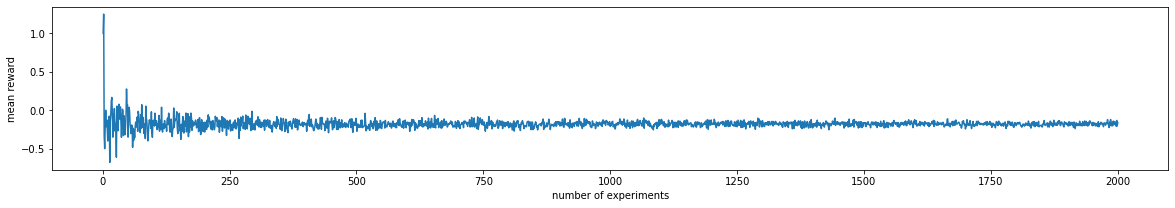

In [28]:
plt.plot(n_s, mean_rewards)
plt.ylabel('mean reward')
plt.xlabel('number of experiments')
plt.rcParams["figure.figsize"] = (30, 3)
plt.show()

In [33]:
print(f'Средний выигрыш = ~{np.round(np.mean(mean_rewards[-100:-1]), 3)}')

Средний выигрыш = ~-0.179


**Комментарий**
Как мы видим, выиграть при такой стратегии играя большое количество игр невозможно. Средний выигрыш в данном случае будет сходиться к `–0.179`.

**2)** Реализуйте метод обучения с подкреплением без модели (можно Q-обучение, но рекомендую попробовать и другие, например Monte Carlo control) для обучения стратегии в блекджеке, используя окружение Blackjack-v0 из OpenAI Gym.

In [196]:
import q_learning

In [221]:
imp.reload(q_learning)

<module 'q_learning' from '/content/drive/My Drive/MADE/3-dl-rl/hw1/q_learning.py'>

In [222]:
q_l = q_learning.Q_learning()

In [223]:
alpha = 0.0001
eps = 0.4
gamma = 1
n = 500000
q_l.train(a=alpha, e=eps, g=gamma, n=n)

In [224]:
# n_s = [10, 30, 100, 500, 1000, 5000, 10000, 100000, 200000]
n_s = [i for i in range(1, 2001)]
mean_rewards = []
for n in n_s:
  rewards = q_l.run_experiment(n)
  mean_rewards.append(np.mean(rewards))

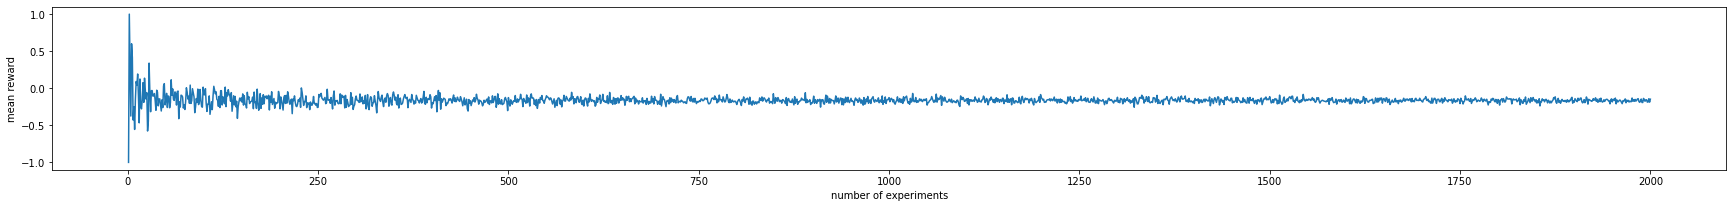

In [225]:
plt.plot(n_s, mean_rewards)
plt.ylabel('mean reward')
plt.xlabel('number of experiments')
plt.rcParams["figure.figsize"] = (30, 3)
plt.show()

In [226]:
print(f'Средний выигрыш = ~{np.round(np.mean(mean_rewards[-100:-1]), 3)}')

Средний выигрыш = ~-0.166


**Комментарий**
Как мы видим, выигрыш получилось увеличить (т.е. уменьшить проигрыш), но не значительно.

**3)** Сколько выигрывает казино у вашей стратегии? Нарисуйте графики среднего дохода вашего метода (усреднённого по крайней мере по 100000 раздач, а лучше больше) по ходу обучения. Попробуйте подобрать оптимальные гиперпараметры.

In [227]:
imp.reload(q_learning)

<module 'q_learning' from '/content/drive/My Drive/MADE/3-dl-rl/hw1/q_learning.py'>

In [230]:
q_l = q_learning.Q_learning()
alpha = 0.0001
eps = 0.4
gamma = 1
n = 500000

In [231]:
k = 20000
d = 200000
mean_rewards = q_l.train_with_means(a=alpha, e=eps, g=gamma, n=n, k=k, d=d)

In [232]:
n_s = [i for i in range(k, n + 1, k)]

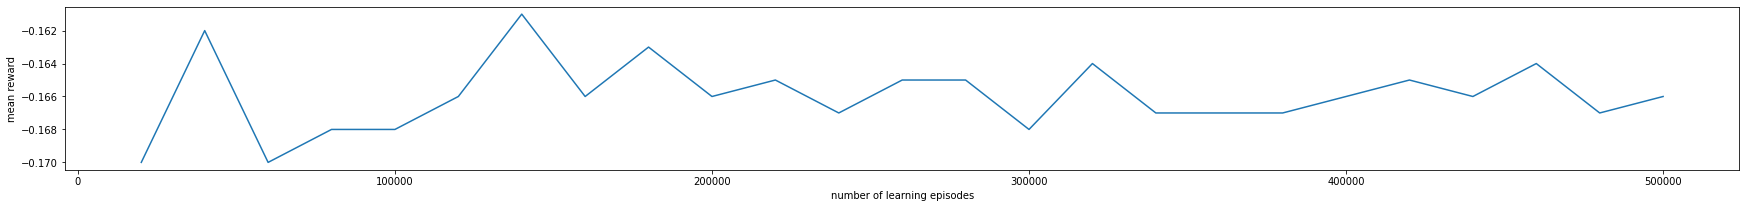

In [233]:
plt.plot(n_s, mean_rewards)
plt.ylabel('mean reward')
plt.xlabel('number of learning episodes')
plt.rcParams["figure.figsize"] = (10, 3)
plt.show()

Попрбуем подобрать гиперпараметры

In [235]:
epss = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
gammas = [0.9, 0.95, 1]
alphas = [0.001, 0.0005, 0.0003, 0.0001, 0.00005, 0.00003, 0.00001]

In [236]:
results = {}
alpha = 0.0001
gamma = 1
n = 200000
n_exp = 200000

for eps in epss:
  q_l = q_learning.Q_learning()
  q_l.train(a=alpha, e=eps, g=gamma, n=n)
  rewards = q_l.run_experiment(n_exp)
  results[eps] = np.round(np.mean(rewards), 3)

print('Результаты подбора epsilon:\n', results)

Результаты подбора epsilon:
 {0.1: -0.167, 0.2: -0.172, 0.3: -0.165, 0.4: -0.165, 0.5: -0.165, 0.6: -0.166, 0.7: -0.162, 0.8: -0.165, 0.9: -0.163}


Топ-3 лучших значения epsilon: 0.3, 0.7, 0.9

In [237]:
results = {}
alpha = 0.0001
eps = 0.4
n = 200000
n_exp = 200000

for gamma in gammas:
  q_l = q_learning.Q_learning()
  q_l.train(a=alpha, e=eps, g=gamma, n=n)
  rewards = q_l.run_experiment(n_exp)
  results[gamma] = np.round(np.mean(rewards), 3)

print('Результаты подбора gamma:\n', results)

Результаты подбора gamma:
 {0.9: -0.164, 0.95: -0.163, 1: -0.165}


Лучший результат у gamma == 0.95

In [238]:
results = {}
epss = [0.3, 0.7, 0.9]
gamma = 0.95
n = 200000
n_exp = 200000

for alpha in alphas:
  results[alpha] = {}
  for eps in epss:
    q_l = q_learning.Q_learning()
    q_l.train(a=alpha, e=eps, g=gamma, n=n)
    rewards = q_l.run_experiment(n_exp)
    results[alpha][eps] = np.round(np.mean(rewards), 3)

print('Результаты подбора alpha c epsilon:\n', results)

Результаты подбора alpha c epsilon:
 {0.001: {0.3: -0.164, 0.7: -0.163, 0.9: -0.164}, 0.0005: {0.3: -0.166, 0.7: -0.161, 0.9: -0.168}, 0.0003: {0.3: -0.163, 0.7: -0.167, 0.9: -0.167}, 0.0001: {0.3: -0.165, 0.7: -0.163, 0.9: -0.166}, 5e-05: {0.3: -0.165, 0.7: -0.167, 0.9: -0.163}, 3e-05: {0.3: -0.161, 0.7: -0.167, 0.9: -0.163}, 1e-05: {0.3: -0.165, 0.7: -0.169, 0.9: -0.165}}


Лучший результат получился при значениях:

* alpha = 0.0005  | 0.00003
* epsillon = 0.7  | 0.3
* gamma = 0.95    | 0.95